# 1. Motivation
Let's imagine we're owning a supermarket mall and through membership cards, we have some basic data about your customers like Customer ID, age, gender, annual income and spending score, which is something we assign to the customer based on our defined parameters like customer behavior and purchasing data.

The main aim of this problem is learning the purpose of the customer segmentation concepts, also known as market basket analysis, trying to understand customers and sepparate them in different groups according to their preferences, and once the division is done, this information can be given to marketing team so they can plan the strategy accordingly.

# 2. Data Information
This dataset is composed by the following five features:

CustomerID: Unique ID assigned to the customer

Gender: Gender of the customer

Age: Age of the customer

Annual Income (k$): Annual Income of the customer

Spending Score (1-100): Score assigned by the mall based on customer behavior and spending nature.

In this particular dataset we have 200 samples to study.

# 3.Changing CSS properties of jupyter notebook

In [1]:
from IPython.display import display, HTML, Javascript

html_contents ="""
<!DOCTYPE html>
<html lang="en">
    <head>
    
    <style>
    
.section2{
    Font-Family: 'Playfair Display', Serif;
    font-style: italic;
    font-weight: bold;
    background: #D9D874;
    color:black;
    text-align: center;
    font-size:30px;
    }
    
.section{
    Font-Family: 'Source Sans Pro', Sans-Serif;
    font-weight: bold;
    font-size:20px;
    color:#a02933;
}

.intro{
    Font-Family: 'Playfair Display', Serif;
    text-align:center;
    font-size:15px;
    color:#4e4151;
    letter-spacing:0.5px;
    
    display:fill;
    background-color:#dbba78;
    padding: 0.8em;
    
    border-style: solid;
    border-color:#4e4151;
    border-radius:10px;     
}

.final{
    Font-Family: 'Playfair Display', Serif;
    text-align:center;
    font-size:15px;
    color:#4e4151;
    letter-spacing:0.5px;
    
    display:fill;
    background-color:#dbba78;
    padding: 0.8em;
    
    border-style: dashed;
    border-color:#4e4151;
    border-radius:10px;     
}

mark {
  Font-Family: 'Playfair Display', Serif;
  font-style: italic;
  background: #a02933;
  font-weight: bold;
  color: #dbba78;
  text-align: center;
  font-size:25px;
  justify-content: center;
}

.intro2 {
       padding: 1rem;
       width: 600px;
       0 5px 15px 0 rgba(0,0,0,0.08);
       border-color:#4e4151;
       border-radius:5px;  
       border-style: dashed;
       background-color:#dbba78;
       font-size:15px;
       font-family: 'Playfair Display', Serif;
       font-weight: none;
       letter-spacing:0.5px;
       text-align: left;
       border-width: 2px;
       color: #4e4151;
  
}

hr { border: 0.2px solid #a02933;
           }
    
    
    </style>
    </head>
    
</html>
"""

HTML(html_contents)

In [2]:
from IPython.display import display, HTML, Javascript

# ----- Notebook Theme -----
color_map  = ["#bfd3e6", "#9b5b4f", "#4e4151", "#78ccdb", "#E9C9C9", "#909195","#dc1e1e","#a02933","#716807","#E9C9C9"]

prompt = color_map[-1]
main_color = color_map[3]
strong_main_color = color_map[1]
custom_colors = [strong_main_color, main_color]

css_file = ''' 

div #notebook {
background-color: white;
line-height: 20px;
}

#notebook-container {
%s
margin-top: 2em;
padding-top: 2em;
border-top: 4px solid %s; /* light orange */
-webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
}

div .input {
margin-bottom: 1em;
}

.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
color: %s; /* light orange */
font-weight: 600;
}

div.input_area {
border: none;
    background-color: %s; /* rgba(229, 143, 101, 0.1); light orange [exactly #E58F65] */
    border-top: 2px solid %s; /* light orange */
}

div.input_prompt {
color: %s; /* light blue */
}

div.output_prompt {
color: %s; /* strong orange */
}

div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
background: %s; /* light orange */
}

div.cell.selected, div.cell.selected.jupyter-soft-selected {
    border-color: %s; /* light orange */
}

.edit_mode div.cell.selected:before {
background: %s; /* light orange */
}

.edit_mode div.cell.selected {
border-color: %s; /* light orange */

}
'''
def to_rgb(h): 
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, main_color,  main_color, prompt, main_color, main_color, main_color, main_color))

def nb(): 
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()

# 4. About Imported Libraries 
numpy|pandas: Will help us treat and explore the data, and execute vector and matrix operations.
matplotlib|seaborn: Will help us plot the information so we can visualize it in different ways and have a better understanding of it.
plotly: Will also help us plotting data in a fancy way.
sklearn: Will provide all necessary tools to train our models and test them afterwards
warnings: Will help to filter the warnings while importing some modules

In [3]:
# Essential Library
import numpy as np 
import pandas as pd
from sklearn.cluster import KMeans


#viz
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
import plotly as py
import plotly.express as px
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import matplotlib as mlb
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

from IPython.display import display
import os
plt.style.use("seaborn")
%matplotlib inline  
import warnings
warnings.filterwarnings("ignore")

#theme
theme = ["#DEF5E5", "#459E97", "#4B9ABB","#0A4361","#E68193",]

Opening the CSV file containing the customer segmentation data

In [4]:
df=pd.read_csv(r"D:\exposys\customer-segmentation-dataset\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

Checking out some basic information like mean,standard deviation and maximum values of data provided

In [6]:
df.describe().T.style.bar(subset=['mean'], color='#E68193')\
                            .background_gradient(subset=['std'], cmap='mako_r')\
                             .background_gradient(subset=['50%'], cmap='mako')

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.000000,100.500000,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000
Age,200.000000,38.850000,13.969007,18.000000,28.750000,36.000000,49.000000,70.000000
Annual Income (k$),200.000000,60.560000,26.264721,15.000000,41.500000,61.500000,78.000000,137.000000
Spending Score (1-100),200.000000,50.200000,25.823522,1.000000,34.750000,50.000000,73.000000,99.000000


In [7]:
df.drop(['CustomerID'],axis=1,inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


checking if there are any duplicated values are there or not

In [8]:
df.duplicated().sum()

0

In [9]:
Z=df
Z.loc[(Z.Age >= 18) & (Z.Age <= 25),  'AgeGroup'] = '18-25'
Z.loc[(Z.Age >= 26) & (Z.Age <= 30),  'AgeGroup'] = '26-30'
Z.loc[(Z.Age >= 31) & (Z.Age <= 40),  'AgeGroup'] = '31-40'
Z.loc[(Z.Age >= 41) & (Z.Age <= 50),  'AgeGroup'] = '41-50'
Z.loc[(Z.Age >= 51) & (Z.Age <= 60),  'AgeGroup'] = '51-60'
Z.loc[(Z.Age >= 60) & (Z.Age <= 100),  'AgeGroup'] = '60+'

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

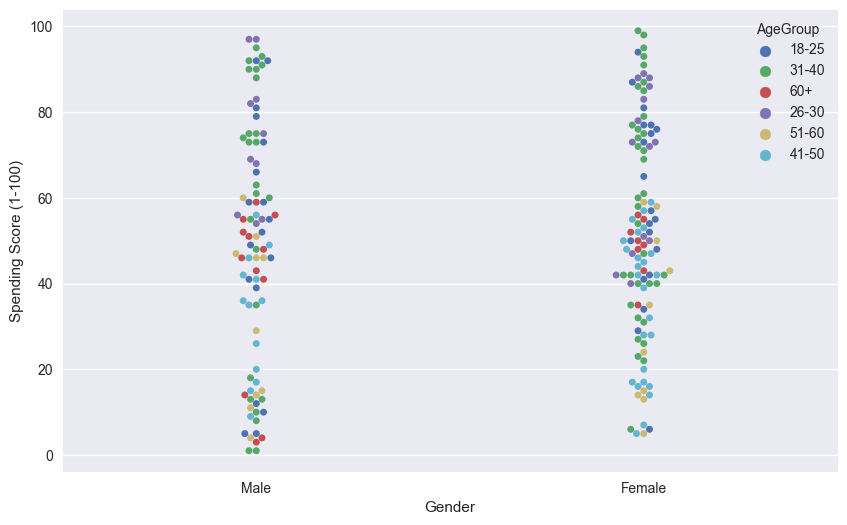

In [10]:
plt.figure(figsize = (10, 6))
sns.swarmplot(data=df, x='Gender', y='Spending Score (1-100)',hue='AgeGroup')

In [11]:
df.drop(['AgeGroup'],axis=1,inplace=True)

In [12]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


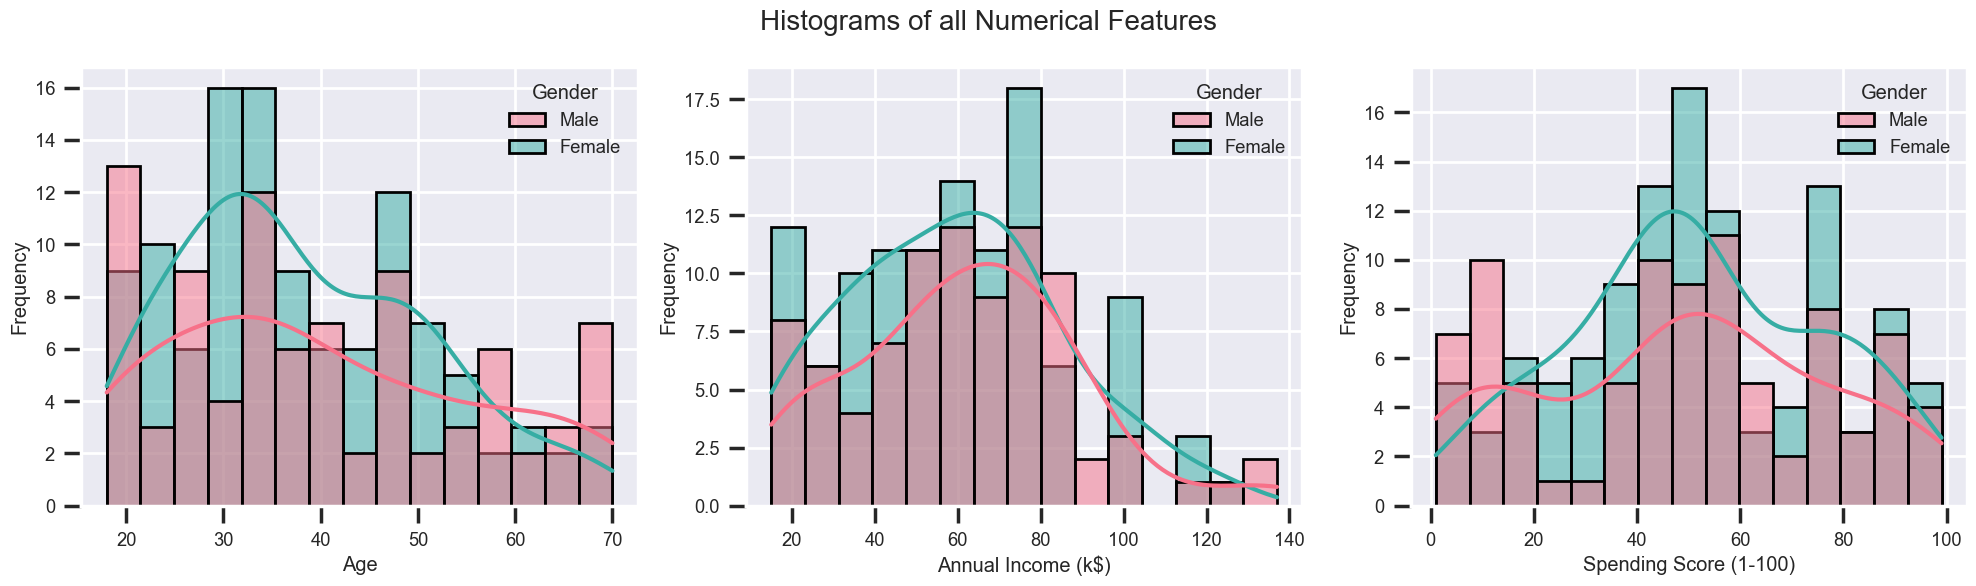

In [13]:
sns.set_context('poster', font_scale= 0.6)
fig, ax  = plt.subplots(1, 3, figsize=(20, 6))

plt.suptitle('Histograms of all Numerical Features', fontsize = 20)

ax1 = sns.histplot(x = df['Age'], hue= df['Gender'], ax= ax[0], bins= 15, kde= True, palette= 'husl')
ax1.set(xlabel= 'Age', ylabel= 'Frequency')

ax2 = sns.histplot(x = df['Annual Income (k$)'], hue= df['Gender'], ax= ax[1], bins= 15, kde= True, palette= 'husl')
ax2.set(xlabel= 'Annual Income (k$)', ylabel= 'Frequency')

ax3 = sns.histplot(x = df['Spending Score (1-100)'], hue= df['Gender'], ax= ax[2], bins= 15, kde= True, palette= 'husl')
ax3.set(xlabel= 'Spending Score (1-100)', ylabel= 'Frequency')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation of Features')

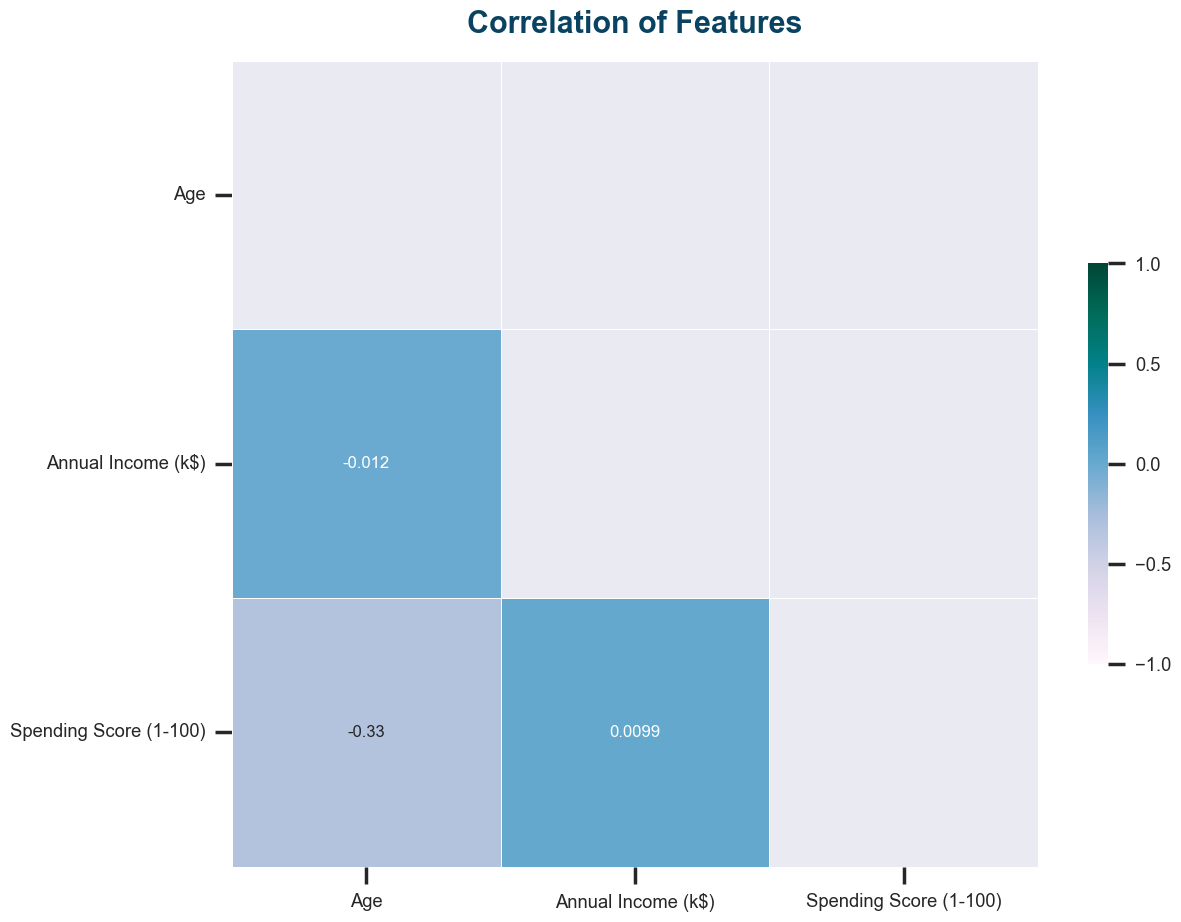

In [14]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]= True


fig, ax = plt.subplots(figsize=(13, 13))

heatmap = sns.heatmap(df.corr(),
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'PuBuGn',
                      cbar_kws = {'shrink': .4,"ticks" : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

#add the column names as labels
ax.set_yticklabels(df.corr(), rotation = 0)
ax.set_xticklabels(df.corr())

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

ax.annotate('correlation',
                    fontsize=10,fontweight='bold',
                    xy=(2.3, 4.2), xycoords='data',
                    xytext=(0.6, 0.95), textcoords='axes fraction',
                    arrowprops=dict(
                    facecolor=theme[4], shrink=0.025, 
                    connectionstyle='arc3, rad=0.80'),
                    horizontalalignment='left', verticalalignment='top'
)

ax.set_title('Correlation of Features', size = 22, color = theme[3], weight='bold', pad=20)

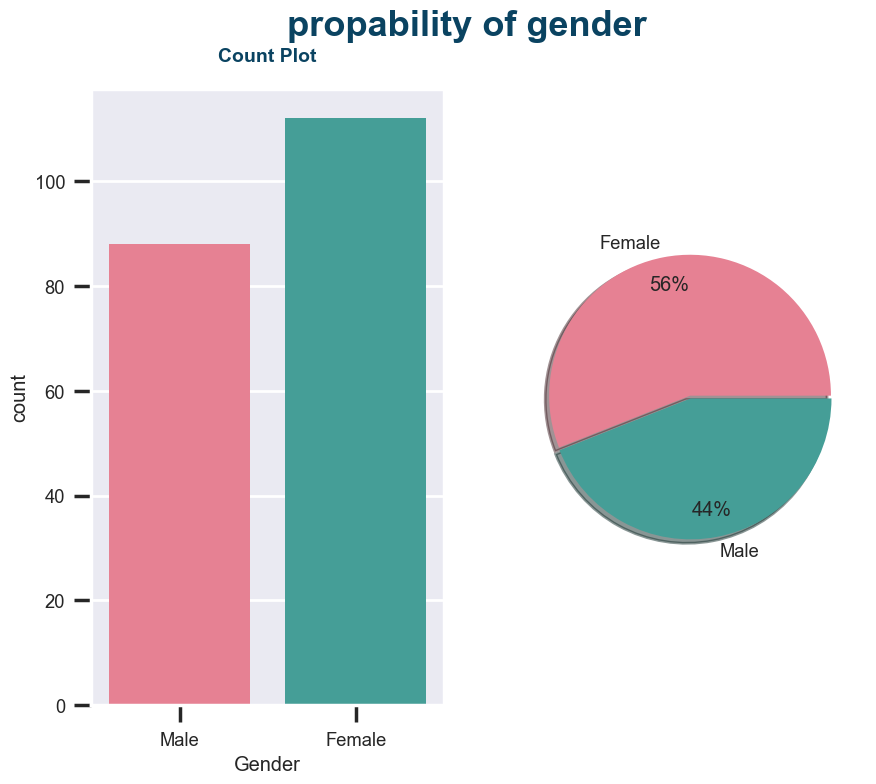

In [15]:
#plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
fig.suptitle(' propability of gender ', size = 26, color = theme[3], weight='bold')
axs = [ax1, ax2]

#Count-Plot
sns.countplot(df['Gender'], ax=ax1, palette='husl')
ax1.set_title('Count Plot', size = 14, color = theme[3], weight='bold', pad=20)



#Data-2
names = ["Female", "Male"]
values = df['Gender'].value_counts()
colors = ["#E68193","#459E97"]
explode = (0.01, 0.01)

#Doughnut-chart
ax2.pie(x= values,labels =names, colors=colors,autopct='%1.0f%%', pctdistance=0.8,explode=explode,shadow= True);

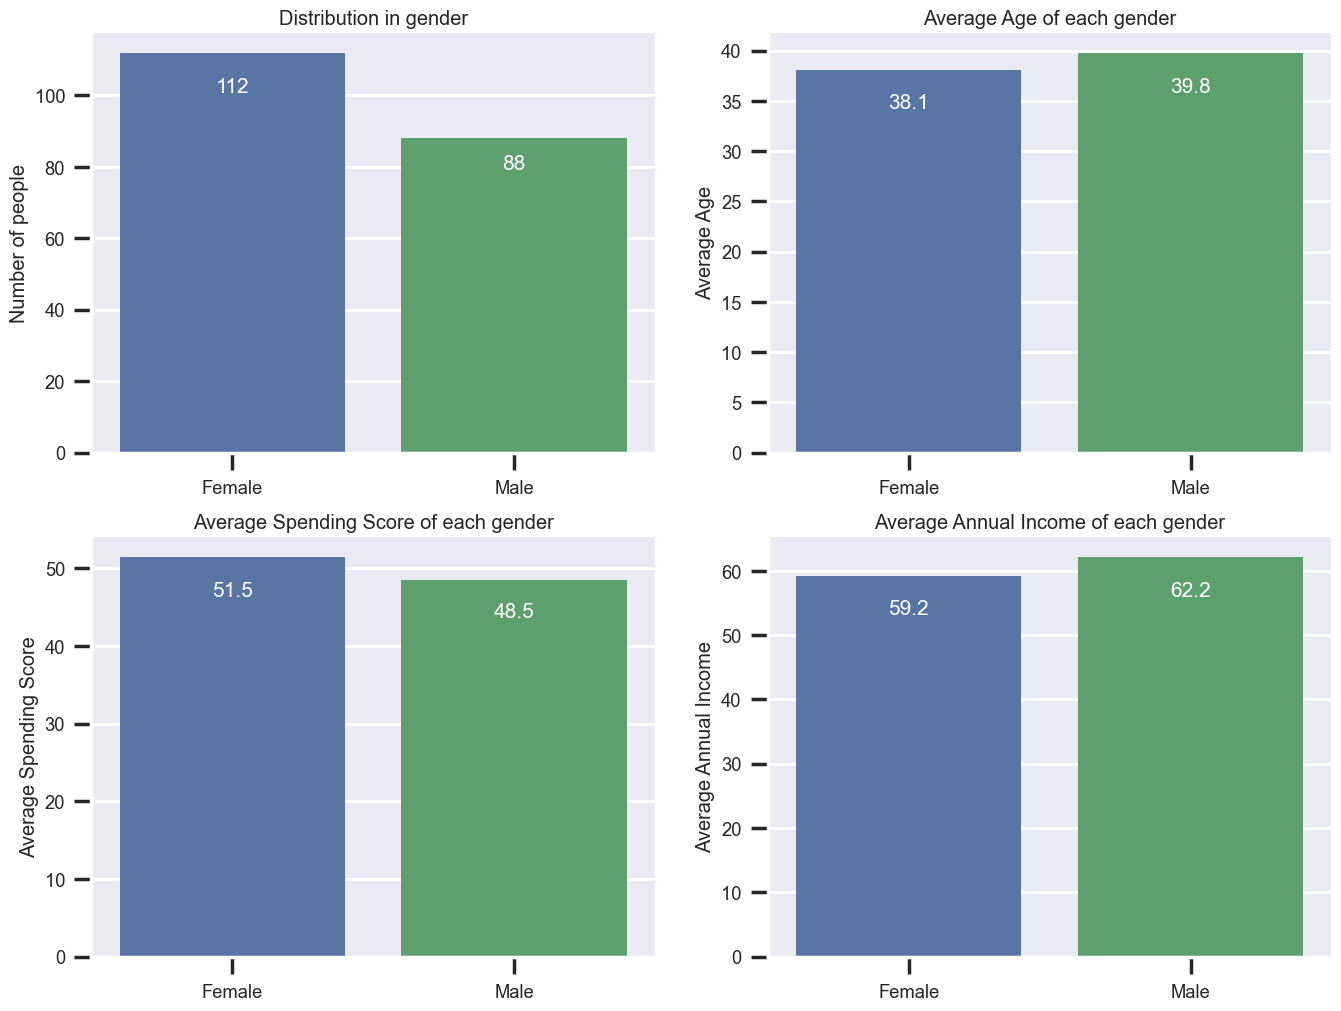

In [16]:
fig, ax = plt.subplots(2,2,figsize=(16,12))

# visualizing the distribution in gender
feature_data = df['Gender'].value_counts()
ax1=sns.barplot(x=np.unique(df['Gender']),ax=ax[0,0],y=df['Gender'].value_counts())
ax1.set_title('Distribution in gender')
ax1.set_ylabel('Number of people')
for i in range(len(feature_data.index)):
    ax1.text(i,feature_data[i]*0.9,feature_data[i],ha='center',
           fontsize=15,color='white')

    
for s in ['top', 'right']:
    ax1.spines[s].set_visible(False)
    
# visualizing the mean age of each gender
feature_data = df.groupby('Gender')['Age'].mean()
ax2=sns.barplot(x=np.unique(df['Gender']),ax=ax[0,1],y=feature_data)
ax2.set_title('Average Age of each gender')
ax2.set_ylabel('Average Age')
for i in range(len(feature_data.index)):
    ax2.text(i,feature_data[i]*0.9,round(feature_data[i],1),ha='center',
           fontsize=15,color='white')

    
for s in ['top', 'right']:
    ax2.spines[s].set_visible(False)

# visualize the mean age of each gender
feature_data = df.groupby('Gender')['Spending Score (1-100)'].mean()
ax2=sns.barplot(x=np.unique(df['Gender']),ax=ax[1,0],y=feature_data)
ax2.set_title('Average Spending Score of each gender')
ax2.set_ylabel('Average Spending Score')
for i in range(len(feature_data.index)):
    ax2.text(i,feature_data[i]*0.9,round(feature_data[i],1),ha='center',
           fontsize=15,color='white')

    
for s in ['top', 'right']:
    ax2.spines[s].set_visible(False)
    
# visualizing the mean age of each gender
feature_data = df.groupby('Gender')['Annual Income (k$)'].mean()
ax2=sns.barplot(x=np.unique(df['Gender']),ax=ax[1,1],y=feature_data)
ax2.set_title('Average Annual Income of each gender')
ax2.set_ylabel('Average Annual Income')
for i in range(len(feature_data.index)):
    ax2.text(i,feature_data[i]*0.9,round(feature_data[i],1),ha='center',
           fontsize=15,color='white')
    
    
for s in ['top', 'right']:
    ax2.spines[s].set_visible(False)
plt.show()

In [17]:
profile=df.profile_report()
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
profile

# 7. Clustering
In the process of clustering we will not be considering the gender factor anymore. The first main reason of why we do take this approach is because the difference between male and female in this data is not particularly high and making a gender differentiaton won't provide any further information. The second and not least important reason is the fact that stores, in general, hardly ever target a specific gender anymore, in almost every store in a shopping center male and female products can be found.

Additionally we do not want to interfere in the process of unsupervised learning, we will leave the algorithm do its job and once it's finished we will analyze the results and extract conclusions and knowledge.

In [19]:
#Creating values for the elbow
X = df.loc[:,["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
inertia = []
k = range(1,20)
for i in k:
    means_k = KMeans(n_clusters=i, random_state=0)
    means_k.fit(X)
    inertia.append(means_k.inertia_)

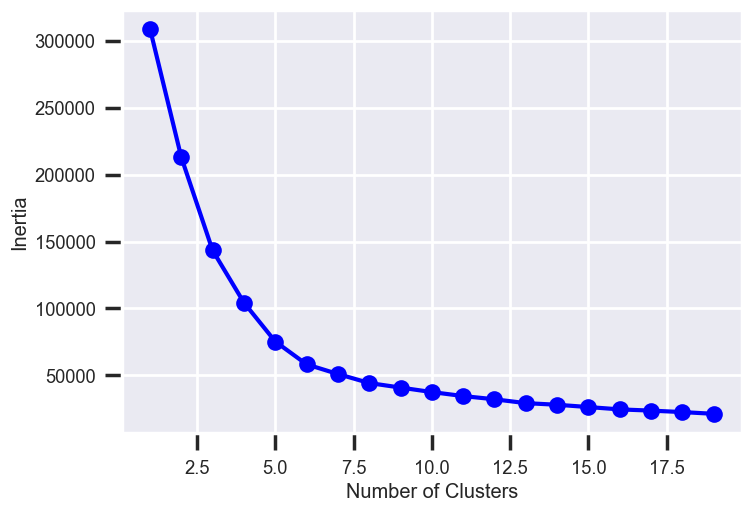

In [20]:
#Plotting the elbow
plt.plot(k , inertia , 'bo-')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [21]:
#Training kmeans with 5 clusters
means_k = KMeans(n_clusters=5, random_state=0)
means_k.fit(X)
labels = means_k.labels_
centroids = means_k.cluster_centers_

In [22]:
#Creating a 3d plot to view the data sepparation made by Kmeans
trace1 = go.Scatter3d(
    x= X['Spending Score (1-100)'],
    y= X['Annual Income (k$)'],
    z= X['Age'],
    mode='markers',
     marker=dict(
        color = labels, 
        size= 10,
        line=dict(
            color= labels,
        ),
        opacity = 0.9
     )
)
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Spending_score'),
            yaxis = dict(title  = 'Annual_income'),
            zaxis = dict(title  = 'Age')
        )
)
fig = go.Figure(data=trace1, layout=layout)
py.offline.iplot(fig)

After plotting the results obtained by K-means on this 3D graphic, it's our job now to identify and describe the five clusters that have been created:

1.Yellow Cluster - The yellow cluster groups young people with moderate to low annual income who actually spend a lot.
2.Purple Cluster - The purple cluster groups reasonably young people with pretty decent salaries who spend a lot.
3.Pink Cluster - The pink cluster basically groups people of all ages whose salary isn't pretty high and their spending score is moderate.
4.Orange Cluster - The orange cluster groups people who actually have pretty good salaries and barely spend money, their age usually lays between thirty and sixty years.
6.Blue Cluster - The blue cluster groups whose salary is pretty low and don't spend much money in stores, they are people of all ages.